In [2]:
import pandas as pd
file_path: str = "data/prepared_sms_data.csv"

df = pd.read_csv(file_path)
df.head()

,label,text,text_length,preprocessed_text,is_spam,u_count,call_count,2_count,get_count,ur_count,...,know_count,come_count,free_count,good_count,?_count,want_count,._count,send_count,..._count,time_count
0,ham,"Go until jurong point, crazy.. Available only ...",111,"['go', 'jurong', 'point,', 'crazy..', 'availab...",False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ham,Ok lar... Joking wif u oni...,29,"['ok', 'lar...', 'joking', 'wif', 'u', 'oni...']",False,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,"['free', 'entry', '2', 'wkly', 'comp', 'win', ...",True,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
3,ham,U dun say so early hor... U c already then say...,49,"['u', 'dun', 'say', 'early', 'hor...', 'u', 'c...",False,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,"['nah', 'think', 'goes', 'usf,', 'lives', 'aro...",False,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
### Prepare splits
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, stratify=df['label'])

In [4]:
train['label'].value_counts()

label
ham     3386
spam     490
Name: count, dtype: int64

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
Y_train = le.fit_transform(train['label'])
Y_test = le.transform(test['label'])

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# TODO: add Tfidf vectorizer here, update the following code and compare results later
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
X_train = vec.fit_transform(train["text"])
X_test = vec.transform(test["text"])

vec = CountVectorizer()
X_train = vec.fit_transform(train['text'])
X_test = vec.transform(test['text'])

In [11]:
# TODO we will take accuracy for the beginning. Which metric would be more suitable and why?
from sklearn.metrics import accuracy_score, f1_score
from sklearn.naive_bayes import MultinomialNB  # falls noch nicht importiert

# ➤ Modelltraining (wenn nicht bereits definiert)
nb_model = MultinomialNB().fit(X_train, Y_train)

# ➤ Vorhersage erstellen
y_pred = nb_model.predict(X_test)

# ➤ Berechnung der Metriken
accuracy = accuracy_score(Y_test, y_pred)
f1 = f1_score(Y_test, y_pred)

# ➤ Ausgabe der Ergebnisse
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.9861
F1-Score: 0.9434


In [12]:
# TODO: What is the baseline for random classification and majority vote?
# Baseline für zufällige Klassifikation (random classification)
# Angenommen, es gibt zwei Klassen ('ham' und 'spam'), die zufällig mit gleicher Wahrscheinlichkeit geraten werden
baseline_random = 0.5  # 50% Trefferchance bei zwei Klassen

# Baseline für Majority Vote (immer die häufigste Klasse vorhersagen)
majority_class_ratio = (Y_test == 0).mean()  # falls 'ham' == 0, 'spam' == 1

print(f"Baseline (Random Classification): {baseline_random:.2f}")
print(f"Baseline (Majority Vote): {majority_class_ratio:.2f}")


Baseline (Random Classification): 0.50
Baseline (Majority Vote): 0.87


In [13]:
results = []

def get_name(classifier):
    return type(classifier).__name__

In [14]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB().fit(X_train, Y_train)
score = nb_model.score(X_test, Y_test)

results.append([get_name(nb_model), score, "count_vec"])

In [16]:
import sklearn.naive_bayes
sklearn.tree.__all__

from sklearn.tree import DecisionTreeClassifier

# TODO: configure the max depth of the decision tree
dt_model = DecisionTreeClassifier().fit(X_train, Y_train)
score = dt_model.score(X_test, Y_test)
results.append([get_name(dt_model), score, "count_vec"])

In [17]:
score = dt_model.score(X_test, Y_test)
score

0.9582366589327146

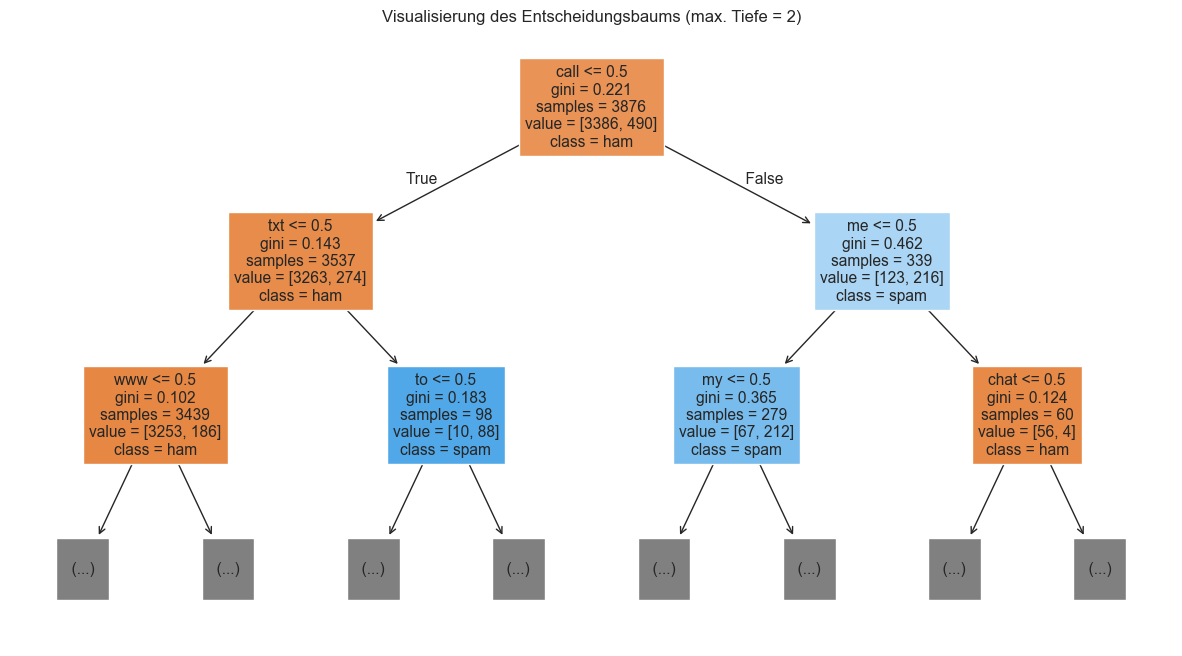

In [18]:
# TODO visualize the decision tree (https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html)

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
plot_tree(dt_model, filled=True, feature_names=vec.get_feature_names_out(), class_names=["ham", "spam"], max_depth=2)
plt.title("Visualisierung des Entscheidungsbaums (max. Tiefe = 2)")
plt.show()


In [19]:
# train also a random forest classifer and a linear svc
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

## All results

In [20]:
result_df = pd.DataFrame(results, columns=["classifer", "accuracy", "vectorizer"])
result_df.sort_values(by=["accuracy"])

,classifer,accuracy,vectorizer
1,DecisionTreeClassifier,0.958237,count_vec
0,MultinomialNB,0.986079,count_vec
